### Mean Shift

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
cap = cv2.VideoCapture('images/carvideo.avi')

In [3]:
# take first frame of the video
ret,frame = cap.read()

In [4]:
# setup initial location of window
r,h,c,w = 150,76,594,72# simply hardcoded the values
track_window = (c,r,w,h)
print(track_window)

(594, 150, 72, 76)


In [5]:
# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

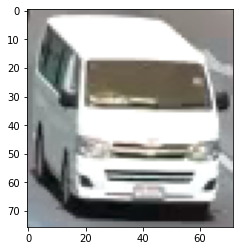

(<matplotlib.image.AxesImage at 0x1ef8c85c250>, None)

In [6]:
plt.imshow(roi), plt.show()

In [7]:
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

array([[4.13314915e+00],
       [3.33713531e+00],
       [3.06159210e+00],
       [5.14347458e+00],
       [2.23496222e+00],
       [1.95941889e+00],
       [5.11285877e+00],
       [2.57173729e+00],
       [5.32716990e+00],
       [7.34782076e+00],
       [2.84728050e+00],
       [9.30723953e+00],
       [1.07768040e+01],
       [6.09256792e+00],
       [2.04514351e+01],
       [1.59815102e+01],
       [2.78604870e+01],
       [2.45233517e+01],
       [4.47298584e+01],
       [4.91691666e+01],
       [5.10061226e+01],
       [5.61189804e+01],
       [5.34247818e+01],
       [3.04322243e+01],
       [7.24066544e+01],
       [6.93144455e+01],
       [4.71485176e+01],
       [8.50204086e+01],
       [7.66316452e+01],
       [8.98271103e+01],
       [1.21483971e+02],
       [8.21731262e+01],
       [7.55600891e+01],
       [1.33577255e+02],
       [2.55000000e+02],
       [1.17718216e+02],
       [2.09290436e+02],
       [1.16401726e+02],
       [1.62050064e+02],
       [2.24353470e+02],


In [8]:
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

In [9]:
while(1):
    ret ,frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)        
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)
        k = cv2.waitKey(60) & 0xff
        
        if k == 27:
            break         
        else:
            cv2.imwrite(chr(k)+".jpg",img2)
    else:
        break
        
cv2.destroyAllWindows()
cap.release()

### CamShift

In [50]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [51]:
cap = cv2.VideoCapture('images/carvideo.avi')

In [52]:
# take first frame of the video
ret,frame = cap.read()

In [53]:
# setup initial location of window
r,h,c,w = 150,76,594,72 # simply hardcoded the values
track_window = (c,r,w,h)

In [54]:
# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
roi_hist = cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)


# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

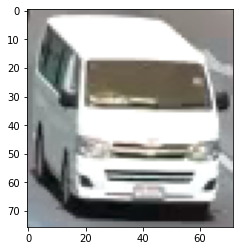

(<matplotlib.image.AxesImage at 0x2a52d210f40>, None)

In [55]:
plt.imshow(roi), plt.show()

In [56]:
while(1):
    ret ,frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # apply meanshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
       
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)
        
        k = cv2.waitKey(60) & 0xff
        
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)
    else:
        break
        
cv2.destroyAllWindows()
cap.release()